## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

IMPORTING LIBRARIES 


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from matplotlib import style 
style.use('fivethirtyeight')
from wordcloud import WordCloud

MOUNTING THE DRIVE AND IMPORTING DATASET

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_original= pd.read_csv('/content/drive/MyDrive/Copy of Airbnb NYC 2019.csv')

In [4]:
# creating a copy of the original dataset.
df= df_original.copy()

OVERVIEW OF THE DATASET

In [5]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
df.shape

(48895, 16)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

CLEANING THE DATASSET

In [8]:
# Checking the count of empty values for each column
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
# removing other null values from  the dataset
df.dropna(how='any',inplace=True)

In [10]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [11]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [12]:
# Lets see an overview of the complete dataset.
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.882100e+04,3.882100e+04,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000
mean,1.810081e+07,6.424582e+07,40.728129,-73.951149,142.332526,5.869220,29.290255,1.373229,5.166611,114.886299
std,1.069372e+07,7.589752e+07,0.054991,0.046693,196.994756,17.389026,48.182900,1.680328,26.302954,129.529950
min,2.539000e+03,2.438000e+03,40.506410,-74.244420,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,8.721444e+06,7.029525e+06,40.688640,-73.982460,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,1.887286e+07,2.837092e+07,40.721710,-73.954810,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,2.756746e+07,1.018905e+08,40.762990,-73.935020,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,3.645581e+07,2.738417e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


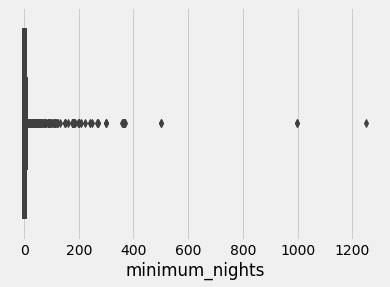

In [13]:
# #the maximum value for minimum nights is 1250 which can easily be concluded as an outlier. Therefore we'll look for outliers and replace them with the mode value
sns.boxplot(x=df['minimum_nights'])

In [14]:
(df['minimum_nights']>400).sum()

5

In [15]:
# replacing the outliers with mean value.
(df['minimum_nights']>400).replace('7',inplace=True)

In [16]:
# The minimum value of price column is 0. It is clearly a mistake, therefore we'll now look for null values in that column:
(df['price']==0).sum()

10

In [17]:
# replacing null values with the mean.
(df['price']==0).replace('152.720687',inplace=True)

In [18]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


NOW THAT OUR DATA HAS BEEN CLEANED WE CAN START ANALYZING IT


1. What can we learn about different hosts and areas?

In [19]:
# Lets see which neighbourhood has the maximum airbnbs
x=df['neighbourhood_group'].value_counts().reset_index()
print(x)

           index  neighbourhood_group
0      Manhattan                16621
1       Brooklyn                16439
2         Queens                 4572
3          Bronx                  875
4  Staten Island                  314


Manhattan and Brooklyn has the most number of airbnbs.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


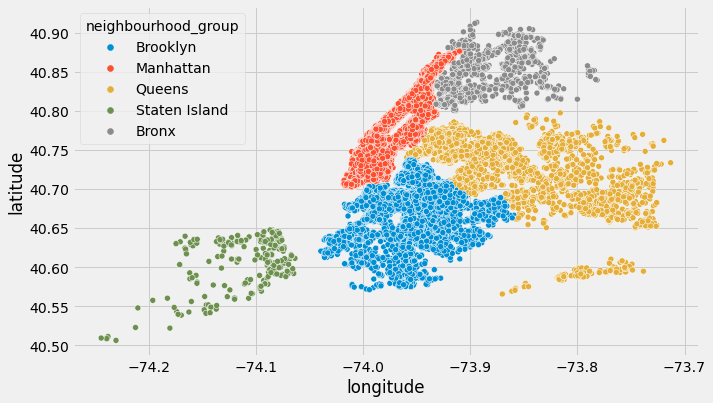

In [20]:
# plotting neighbourood groups on map
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group)
plt.ioff()

Lets see which host has the most number of listing

In [21]:
# finding the top host 
top_host=df.host_id.value_counts().head(16)
top_host


219517861    207
61391963      79
16098958      61
137358866     51
7503643       49
190921808     46
30283594      43
1475015       42
120762452     40
2119276       39
22541573      39
119669058     34
205031545     34
25237492      33
113805886     29
12243051      29
Name: host_id, dtype: int64

In [22]:
# creating a data frame of top host for visualization
top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_ID', 'host_id':'Count'}, inplace=True)
top_host_df

,Host_ID,Count
0,219517861,207
1,61391963,79
2,16098958,61
3,137358866,51
4,7503643,49
5,190921808,46
6,30283594,43
7,1475015,42
8,120762452,40
9,2119276,39


Text(0.5, 0, 'Host IDs')

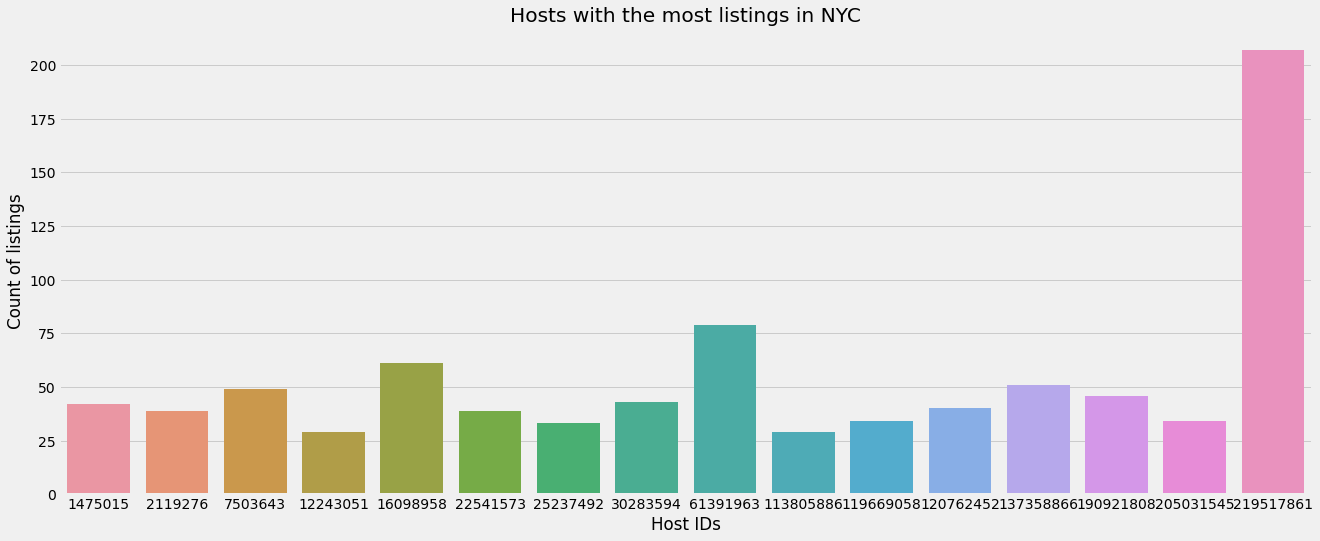

In [23]:
# visualizing the top 15 hosts:
plt.figure(figsize=(20,8))
viz_1=sns.barplot(x="Host_ID", y="Count", data=top_host_df)
viz_1.set_title('Hosts with the most listings in NYC')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')


Lets see the price of different room type in different neighbourhoods

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


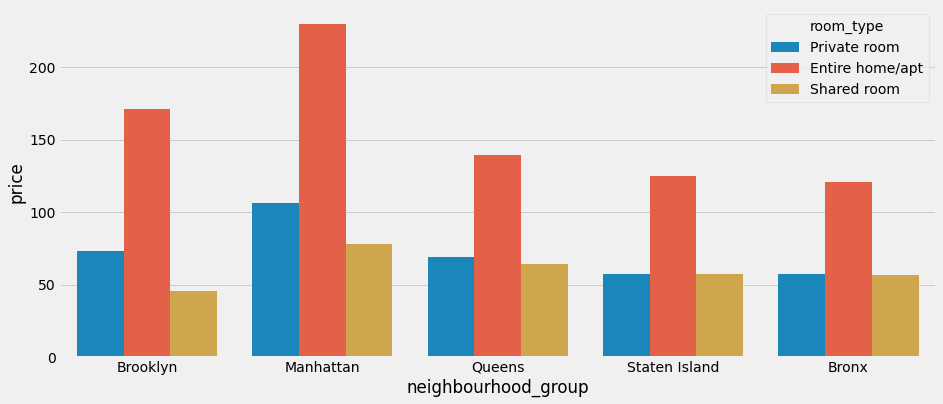

In [24]:
#using barplot to showcase price of different neighbourhood groups with respect to room types
plt.figure(figsize=(14, 6))
sns.barplot(df.neighbourhood_group, df.price, hue=df.room_type, ci=None)

2. What can we learn from predictions?
Lets see which price range is the most popular




In [25]:
price_area = df.groupby(['price'])['number_of_reviews'].max().reset_index()
price_area.head(5)

,price,number_of_reviews
0,0,95
1,10,93
2,11,113
3,12,8
4,13,9


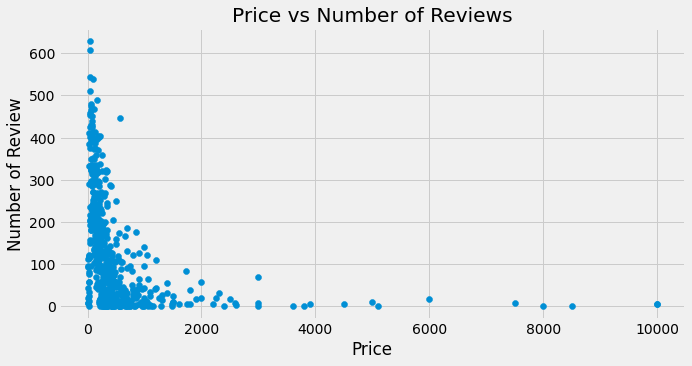

In [26]:
# 
area = price_area['price']
price = price_area['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.scatter(area, price)
 
plt.xlabel("Price")
plt.ylabel("Number of Review")
plt.title("Price vs Number of Reviews")
plt.show()

:Airbnbs with price less than 2000 have frequently been booked.There is only one booking in the most expensive aibnb. We can conclude people prefer cheaper and affordable stays

Finding the mean prices of different neighbourhoods through the year

In [27]:
grouped_by_city = df[['price', 'neighbourhood_group']].groupby(['neighbourhood_group']).agg(['mean', 'count'])

In [28]:
grouped_by_city

price       
                           mean  count
neighbourhood_group                   
Bronx                 79.558857    875
Brooklyn             121.463289  16439
Manhattan            180.071596  16621
Queens                95.783683   4572
Staten Island         89.964968    314

In [29]:
#feature extraction of year and month from last_review
df['Year'] = pd.DatetimeIndex(df['last_review']).year 
df['month'] = pd.DatetimeIndex(df['last_review']).month

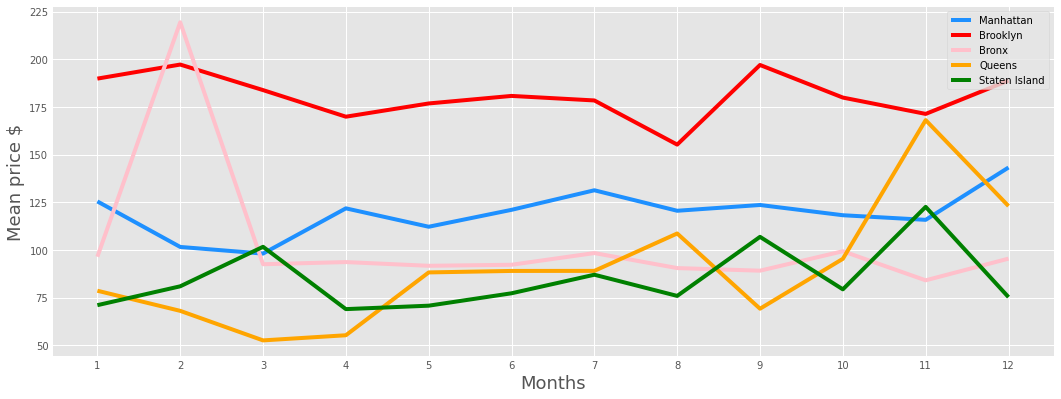

In [30]:
def time_series_1(df):
    style.use('ggplot')
    plt.figure(figsize=(16,6))
    x_labels = [x for x in range(1,13)]
    colors = ['dodgerblue','red','pink','orange','green']
    for i  in range(len(df['neighbourhood_group'].unique())):
        temp_df = df[df['neighbourhood_group']==df['neighbourhood_group'].unique()[i]]
        temp_df2 = temp_df.groupby(['month']).mean()
        plt.plot(temp_df2.index,temp_df2['price'],color=colors[i])
    plt.xticks(temp_df2.index,x_labels)
    plt.xlabel('Months',fontsize=18)
    plt.ylabel('Mean price $',fontsize=18)
    plt.legend(['Manhattan', 'Brooklyn', 'Bronx', 'Queens', 'Staten Island'],loc='upper right')
    plt.show()
time_series_1(df)

Bronx experiences a surge in price in the month of February. Brooklyn maintains a high price throughout the year although prices in August are bit cheap. Queens is expensive in the month of November.

Busiest month for airbnbs

In [31]:
df['month'].value_counts(normalize= True)

6     0.349965
7     0.152830
5     0.121068
1     0.071250
4     0.054326
12    0.045568
8     0.042838
10    0.039798
9     0.039540
3     0.033178
11    0.029803
2     0.019835
Name: month, dtype: float64

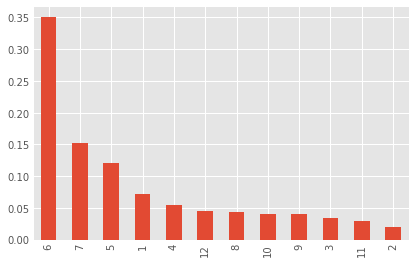

In [ ]:
df['month'].value_counts(normalize= True).plot(kind='bar')

June and July are the busiest months. 35% of the bookings are done in June and 15% bookings are done in July. This can be because most people travel in their summer vacations

3. Which hosts are the busiest and why?


In [ ]:
busiest_hosts = df.groupby(['host_name','host_id','room_type','price'])['number_of_reviews'].max().reset_index()
busiest_hosts = busiest_hosts.sort_values(by='number_of_reviews', ascending=False).head(11)
busiest_hosts

,host_name,host_id,room_type,price,number_of_reviews
9386,Dona,47621202,Private room,47,629
16433,Jj,4734398,Private room,49,607
23765,Maya,37312959,Private room,46,543
5768,Carol,2369681,Private room,99,540
8182,Danielle,26432133,Private room,48,510
3652,Asa,12949460,Entire home/apt,160,488
35062,Wanda,792159,Private room,60,480
20958,Linda,2680820,Private room,55,474
7922,Dani,42273,Entire home/apt,120,467
2672,Angela,23591164,Private room,65,466


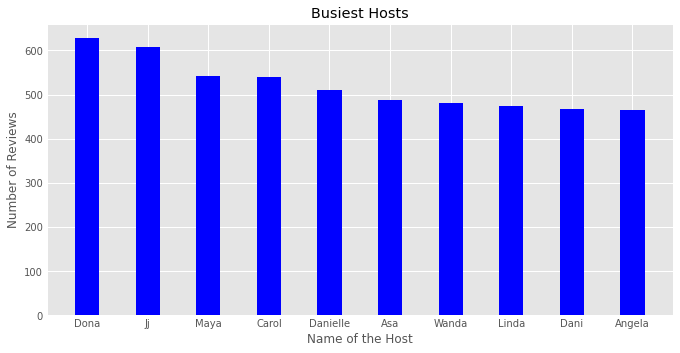

In [ ]:
name = busiest_hosts['host_name']
reviews = busiest_hosts['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(name, reviews, color ='blue',
        width = 0.4)
 
plt.xlabel("Name of the Host")
plt.ylabel("Number of Reviews")
plt.title("Busiest Hosts")
plt.show()

This is the list of top 10 buiest hosts. On analyzing the table we can notice some similarities. Private rooms are booked most. Price range is between 45-100 dollars. Therefore we can conclude people prefer private rooms in price range 45-100.

In [ ]:
df.head()   

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Year,month
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2018,10
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2019,5
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2019,7
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,2018,11
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,2019,6


Is there any noticeable difference of traffic among different areas and what could be the reason for it?

In [ ]:
traffic_areas = df.groupby(['neighbourhood_group','room_type'])['number_of_reviews'].count().reset_index()
traffic_areas = traffic_areas.sort_values(by='number_of_reviews', ascending=False)
traffic_areas

,neighbourhood_group,room_type,number_of_reviews
6,Manhattan,Entire home/apt,9962
3,Brooklyn,Entire home/apt,8159
4,Brooklyn,Private room,7990
7,Manhattan,Private room,6303
10,Queens,Private room,2678
9,Queens,Entire home/apt,1742
1,Bronx,Private room,524
8,Manhattan,Shared room,356
0,Bronx,Entire home/apt,308
5,Brooklyn,Shared room,290


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 1.0, 'Traffic By Neighborhood')

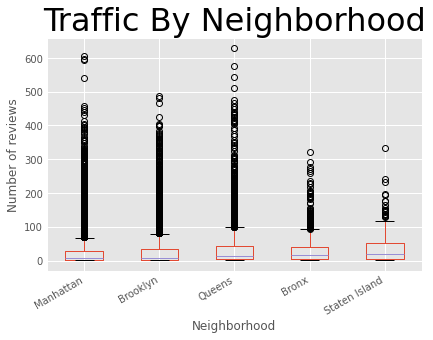

In [ ]:
def boxplot_sorted(df, by, column, rot=0):
    df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
    meds = df2.median().sort_values()
    return df2[meds.index].boxplot(rot=rot, return_type="axes")
axes = boxplot_sorted(df, by=["neighbourhood_group"], column="number_of_reviews")
plt.xticks(rotation=30, horizontalalignment='right')
plt.xlabel("Neighborhood")
plt.ylabel("Number of reviews")
plt.title("Traffic By Neighborhood", fontsize= 32)


In [ ]:
neighboorhood_price = df[['neighbourhood_group', 'price']]
neighboorhood_price = neighboorhood_price.reset_index(drop=True)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 1.0, 'Price By Neighborhood')

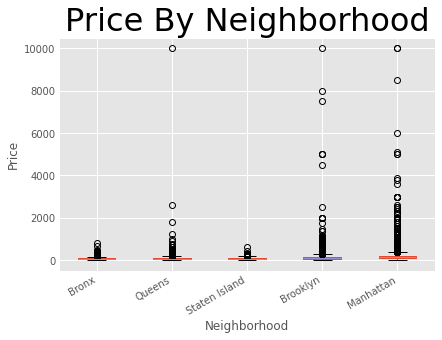

In [ ]:
def boxplot_sorted(neighbourhood_price, by, column, rot=0):
    df2 = pd.DataFrame({col:vals[column] for col, vals in neighbourhood_price.groupby(by)})
    meds = df2.median().sort_values()
    return df2[meds.index].boxplot(rot=rot, return_type="axes")
axes = boxplot_sorted(neighboorhood_price, by=["neighbourhood_group"], column="price")
plt.xticks(rotation=30, horizontalalignment='right')
plt.xlabel("Neighborhood")
plt.ylabel("Price")
plt.title("Price By Neighborhood", fontsize= 32)

Manhattan and Brooklyn are the busiest neighbourhoods. The prices in these neighbourhoods are also high.

Conclusion:
1. People prefer to stay in cheaper accomodations.
2. If you are looking for cheaper stays then it is recommended to not travel to Bronx in the month of February and Queens in the month of November
3. June and July are the busiest months.
4. Private rooms are preferred as compared to other room type
5. Brooklyn and Manhattan experiences highest traffic. This is because they are tourist place. The average price in also Brooklyn and Manhattan are higher as compared to other neighbourhoods.

Use case:
Our client is solo traveller who is looking for a peaceful time away from the noise of the city. He is travelling on a budget so he prefers a cheap neighbourhood. He has planned a week’s trip so the minimum nights has to be seven or less. In addition the user requires a private room because he wants a peaceful and alone time. 
Client's constraint is his budget which is 500 for a week's trip.

In [32]:
# first we will create a copy of dataset for use case
df1= df.copy()

Now that we have the dataset we can start filtering it as per our use case


In [33]:
# only considering Airbnbs with price less that 50.
df1= df1[df1['price']<50]

In [34]:
# minimum number of nights should be 7 or less
df1= df1[df1['minimum_nights']<7]

In [35]:
df1= df1[df1['room_type']=='Private room']

In [36]:
df1.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Year,month
28,9518,"SPACIOUS, LOVELY FURNISHED MANHATTAN BEDROOM",31374,Shon,Manhattan,Inwood,40.86482,-73.92106,Private room,44,3,108,2019-06-15,1.11,3,311,2019,6
58,15338,Room in Greenpoint Loft w/ Roof,32169,Andrea,Brooklyn,Greenpoint,40.72401,-73.93788,Private room,49,4,138,2019-06-04,1.19,3,320,2019,6
171,44096,Room with a View,190409,Waundell,Bronx,Highbridge,40.83232,-73.93184,Private room,40,1,219,2019-07-04,2.04,3,353,2019,7
207,54626,Cozy bedroom by Yankee Stadium,190409,Waundell,Bronx,Highbridge,40.83075,-73.93058,Private room,45,1,138,2019-06-30,1.45,3,323,2019,6
249,62452,A SpeciaL!! Private Room in NY,303939,Lissette,Staten Island,Tompkinsville,40.63536,-74.08537,Private room,36,2,193,2019-06-25,1.85,6,360,2019,6


In [ ]:
df1.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Year,month
count,2.703000e+03,2.703000e+03,2703.000000,2703.000000,2703.000000,2703.000000,2703.000000,2703.000000,2703.000000,2703.000000,2703.000000,2703.000000
mean,1.999093e+07,8.063161e+07,40.718065,-73.922576,40.704772,2.175731,29.936367,1.558642,2.471698,99.477617,2018.304477,6.009989
std,9.415616e+06,7.683887e+07,0.069075,0.057372,6.469435,1.317132,53.726578,1.972370,3.108903,124.755765,1.117523,2.551522
min,9.518000e+03,2.787000e+03,40.543120,-74.173880,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000,2013.000000,1.000000
25%,1.314542e+07,1.649025e+07,40.675405,-73.949650,37.000000,1.000000,3.000000,0.210000,1.000000,0.000000,2018.000000,5.000000
50%,2.074138e+07,5.060097e+07,40.696690,-73.928120,41.000000,2.000000,10.000000,0.890000,1.000000,32.000000,2019.000000,6.000000
75%,2.803793e+07,1.338284e+08,40.758995,-73.905425,45.000000,3.000000,36.000000,2.200000,3.000000,180.000000,2019.000000,7.000000
max,3.645581e+07,2.723141e+08,40.913060,-73.729310,49.000000,6.000000,629.000000,20.940000,43.000000,365.000000,2019.000000,12.000000


Now that we have filtered the data according to our use case, we can start analyzing it and see which host suits the requirement of our client. 

In [39]:
neighbourhood_traffic = df1.groupby(['neighbourhood_group'])['number_of_reviews'].count().reset_index()
neighbourhood_traffic = neighbourhood_traffic.sort_values(by='number_of_reviews', ascending=False)
neighbourhood_traffic

,neighbourhood_group,number_of_reviews
1,Brooklyn,1472
3,Queens,630
2,Manhattan,329
0,Bronx,207
4,Staten Island,65


Staten Island has comparatively less traffic therefore it might be the ideal destination for our client.

In [40]:
  busiest_hosts1 = df1.groupby(['host_name','host_id','room_type','price','neighbourhood_group','minimum_nights'])['number_of_reviews'].max().reset_index()
busiest_hosts1 = busiest_hosts1.sort_values(by='number_of_reviews', ascending=False).head(15)
busiest_hosts1

,host_name,host_id,room_type,price,neighbourhood_group,minimum_nights,number_of_reviews
610,Dona,47621202,Private room,47,Queens,1,629
1118,Jj,4734398,Private room,49,Manhattan,1,607
1635,Maya,37312959,Private room,46,Queens,1,543
521,Danielle,26432133,Private room,48,Queens,1,510
1634,Maya,37312959,Private room,45,Queens,1,459
1633,Maya,37312959,Private room,32,Queens,1,411
576,Dennis,949221,Private room,43,Brooklyn,1,401
190,Antonio,9284163,Private room,29,Queens,2,386
1913,Paulette,20134231,Private room,40,Queens,2,375
1328,Kevin,119592255,Private room,45,Queens,1,336


Concluion:
1. A lot of top hosts are from Queens. That means our client can choose from a variety of Airbnbs. 
2. Also availability won't be an issue in Queens beause there are a lot of options to choose from. 
3. Only one host from Staten Island is in top 20 busiest hosts. 
4. We will recommend our client to travel to Staten Island only after pre booking the room because it might be hard to get a decent room due to less availability.
5. Queens has a lot of Airbnbs fitting the client's criteria therefore Queens is the ideal destination for our client.